In [1]:
import numpy as np

# 神经网络 Neural Networks
多个特征的非线性多项式，使用线性回归和逻辑回归无法解决问题。譬如识别汽车，使用像素的值（饱和度或者亮度等）来识别，如果每个像素一个值，只是50*50像素的小图片都将有2500个特征，如果特征之间还有两两组合的关系，会扩充到2500**2/2将近300万个特征。

这章用week3的$g(h(x))$举了一些例子，其实就是神经网络向前（**从左到右的算法称为前向传播算法 (FORWARD PROPAGATION )**）传了两层，可以设计不同的权重让函数表达一些逻辑关系（AND OR NOT等）。

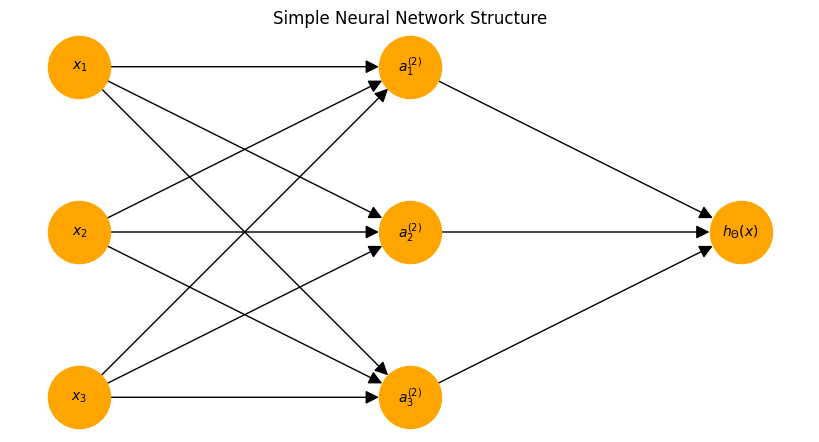

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_nodes_from(["$x_1$", "$x_2$", "$x_3$"], layer=1)
G.add_nodes_from(["$a_1^{(2)}$", "$a_2^{(2)}$", "$a_3^{(2)}$"], layer=2)
G.add_node("$h_\\Theta(x)$", layer=3)

edges = [("$x_1$", "$a_1^{(2)}$"), ("$x_1$", "$a_2^{(2)}$"), ("$x_1$", "$a_3^{(2)}$"),
         ("$x_2$", "$a_1^{(2)}$"), ("$x_2$", "$a_2^{(2)}$"), ("$x_2$", "$a_3^{(2)}$"),
         ("$x_3$", "$a_1^{(2)}$"), ("$x_3$", "$a_2^{(2)}$"), ("$x_3$", "$a_3^{(2)}$"),
         ("$a_1^{(2)}$", "$h_\\Theta(x)$"), ("$a_2^{(2)}$", "$h_\\Theta(x)$"), ("$a_3^{(2)}$", "$h_\\Theta(x)$")]
G.add_edges_from(edges)

pos = {"$x_1$": (0, 2), "$x_2$": (0, 1), "$x_3$": (0, 0),
       "$a_1^{(2)}$": (1, 2), "$a_2^{(2)}$": (1, 1), "$a_3^{(2)}$": (1, 0),
       "$h_\\Theta(x)$": (2, 1)}

plt.figure(figsize=(8, 4))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='orange', font_size=10, font_weight='bold', arrowsize=20)
plt.title('Simple Neural Network Structure')

plt.show()



用week3中的例子做个说明：

$x = \begin{bmatrix} 
x_0 \\ x_1 \\ x_2 \\ x_3 
\end{bmatrix}, \quad
z^{(2)} = \begin{bmatrix}
z_1^{(2)} \\ z_2^{(2)} \\ z_3^{(2)}
\end{bmatrix}$

$z^{(2)} = \Theta^{(1)} x, \quad a^{(2)} = g(z^{(2)})$

$g\left(
\begin{bmatrix}
\theta_{10}^{(1)} & \theta_{11}^{(1)} & \theta_{12}^{(1)} & \theta_{13}^{(1)} \\
\theta_{20}^{(1)} & \theta_{21}^{(1)} & \theta_{22}^{(1)} & \theta_{23}^{(1)} \\
\theta_{30}^{(1)} & \theta_{31}^{(1)} & \theta_{32}^{(1)} & \theta_{33}^{(1)}
\end{bmatrix}
\begin{bmatrix}
x_0 \\ x_1 \\ x_2 \\ x_3
\end{bmatrix}
\right) = 
g\left(\begin{bmatrix}
\theta_{10}^{(1)}x_0 + \theta_{11}^{(1)}x_1 + \theta_{12}^{(1)}x_2 + \theta_{13}^{(1)}x_3 \\
\theta_{20}^{(1)}x_0 + \theta_{21}^{(1)}x_1 + \theta_{22}^{(1)}x_2 + \theta_{23}^{(1)}x_3 \\
\theta_{30}^{(1)}x_0 + \theta_{31}^{(1)}x_1 + \theta_{32}^{(1)}x_2 + \theta_{33}^{(1)}x_3
\end{bmatrix}
\right) = 
\begin{bmatrix}
a_1^{(2)} \\
a_2^{(2)} \\
a_3^{(2)}
\end{bmatrix}$

$g\left(
\begin{bmatrix}
\theta_{10}^{(2)} & \theta_{11}^{(2)} & \theta_{12}^{(2)} & \theta_{13}^{(2)} 
\end{bmatrix}
\begin{bmatrix}
a_0^{(2)} \\ a_1^{(2)} \\ a_2^{(2)} \\ a_3^{(2)} 
\end{bmatrix}
\right) = 
g(\theta_{10}^{(2)}a_0^{(2)} + \theta_{11}^{(2)}a_1^{(2)} + \theta_{12}^{(2)}a_2^{(2)} + \theta_{13}^{(2)}a_3^{(2)})
= h_\Theta(x)$


- AND 函数 ：

$h_\Theta(x) = g(-30 + 20x_1 + 20x_2)$

$g(z) = \frac{1}{1+e^{-z}}$


| $x_1$ | $x_2$ | $h_\Theta(x)$     |
|-------|-------|------------------ |
| 0     | 0     | $g(-30) \approx 0$ |
| 0     | 1     | $g(-10) \approx 0$ |
| 1     | 0     | $g(-10) \approx 0$ |
| 1     | 1     | $g(10) \approx 1$  |

可以表示为
$: h_\Theta(x) \approx x_1 \text{ AND } x_2$

- OR 函数 ：

$h_\Theta(x) = g(-10 + 20x_1 + 20x_2)$

$g(z) = \frac{1}{1+e^{-z}}$


| $x_1$ | $x_2$ | $h_\Theta(x)$     |
|-------|-------|------------------ |
| 0     | 0     | $g(-30) \approx 0$ |
| 0     | 1     | $g(-10) \approx 1$ |
| 1     | 0     | $g(-10) \approx 1$ |
| 1     | 1     | $g(10) \approx 1$  |

可以表示为
$: h_\Theta(x) \approx x_1 \text{ OR } x_2$
